<a href="https://colab.research.google.com/github/Prithviraj2706/DataScience-Assignment/blob/main/Naive_Baye's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

In [2]:
train=pd.read_csv('/content/SalaryData_Train.csv')
test=pd.read_csv('/content/SalaryData_Test.csv')

EDA on train data

In [3]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18645 entries, 0 to 18644
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            18645 non-null  int64 
 1   workclass      18645 non-null  object
 2   education      18645 non-null  object
 3   educationno    18645 non-null  int64 
 4   maritalstatus  18645 non-null  object
 5   occupation     18645 non-null  object
 6   relationship   18645 non-null  object
 7   race           18645 non-null  object
 8   sex            18645 non-null  object
 9   capitalgain    18645 non-null  int64 
 10  capitalloss    18645 non-null  int64 
 11  hoursperweek   18645 non-null  int64 
 12  native         18645 non-null  object
 13  Salary         18644 non-null  object
dtypes: int64(5), object(9)
memory usage: 2.0+ MB


In [5]:
train.shape

(18645, 14)

In [6]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,18645.000000,18645.000000,18645.000000,18645.000000,18645.000000
mean,38.490695,10.124001,1073.642692,88.679539,40.900885
std,13.179845,2.530582,7374.919691,403.399003,11.906083
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [7]:
train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           1
dtype: int64

In [8]:
train.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
18640    False
18641    False
18642    False
18643    False
18644    False
Length: 18645, dtype: bool

In [9]:
train=train.drop_duplicates()

In [10]:
pd.crosstab(train['occupation'],train['Salary'])

Salary,<=50K,>50K
occupation,,
Adm-clerical,1866,297
Armed-Forces,7,0
Craft-repair,1601,471
Exec-managerial,1199,1092
Farming-fishing,510,63
Handlers-cleaners,665,52
Machine-op-inspct,938,146
Other-service,1792,89
Priv-house-serv,101,0


In [11]:
pd.crosstab(train['workclass'],train['Salary'])

Salary,<=50K,>50K
workclass,,
Federal-gov,367,218
Local-gov,914,362
Private,9624,2719
Self-emp-inc,292,362
Self-emp-not-inc,1108,438
State-gov,570,208
Without-pay,6,0


In [12]:
pd.crosstab(train['workclass'],train['occupation'])

occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
workclass,,,,,,,,,,,,,,
Federal-gov,193,7,41,100,4,14,9,26,0,102,22,9,45,14
Local-gov,175,0,91,131,21,25,5,123,0,430,176,5,24,70
Private,1583,0,1520,1475,250,665,1027,1538,101,1287,111,1662,401,723
Self-emp-inc,20,0,62,239,26,1,8,13,0,92,3,172,2,16
Self-emp-not-inc,36,0,326,232,263,8,26,105,0,232,5,233,16,64
State-gov,157,0,31,114,7,3,8,76,0,248,70,4,41,19
Without-pay,0,0,1,0,2,1,1,0,0,0,0,0,0,1


Visualisation on train data

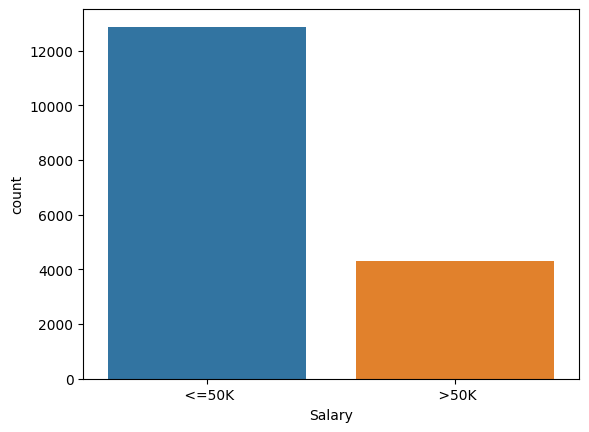

 <=50K    12881
 >50K      4307
Name: Salary, dtype: int64

In [13]:
sns.countplot(x='Salary',data= train)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
train['Salary'].value_counts()

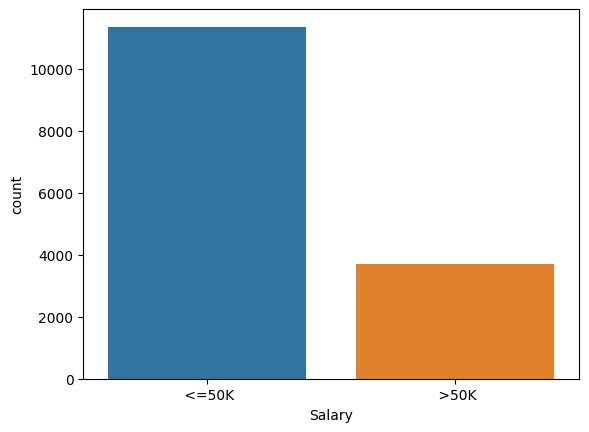

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

In [14]:
sns.countplot(x='Salary',data= test)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
test['Salary'].value_counts()

<Axes: xlabel='occupation', ylabel='workclass'>

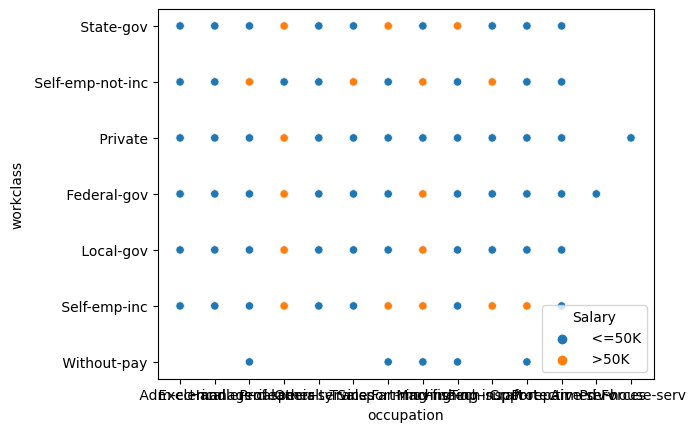

In [15]:
sns.scatterplot(train,x=train['occupation'],y=train['workclass'],hue=train['Salary'])

<Axes: xlabel='education'>

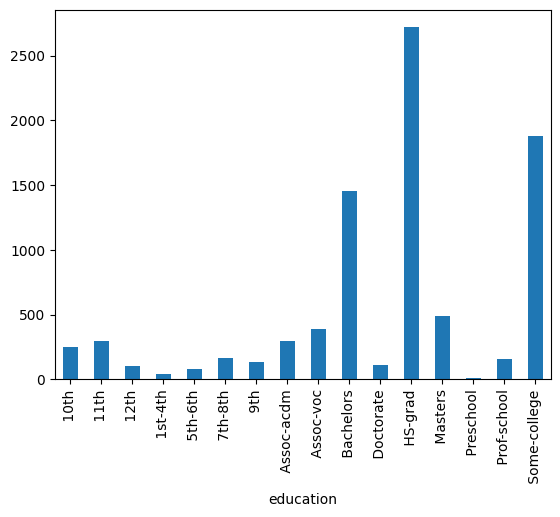

In [16]:
pd.crosstab(train['Salary'],train['education']).mean().plot(kind='bar')

<Axes: xlabel='occupation'>

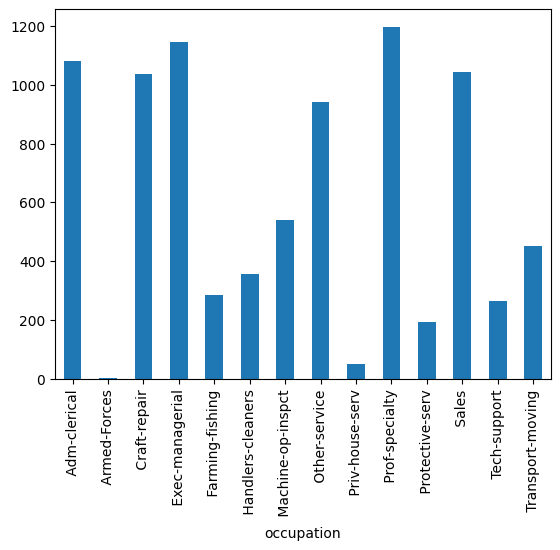

In [17]:
pd.crosstab(train['Salary'],train['occupation']).mean().plot(kind='bar')

<Axes: xlabel='workclass'>

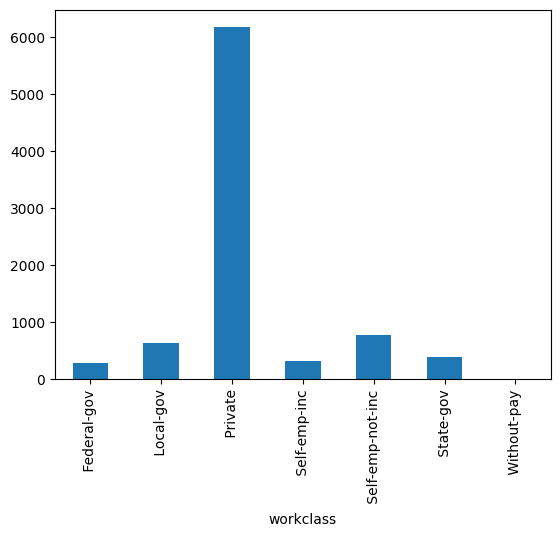

In [18]:
pd.crosstab(train['Salary'],train['workclass']).mean().plot(kind='bar')

<Axes: xlabel='sex'>

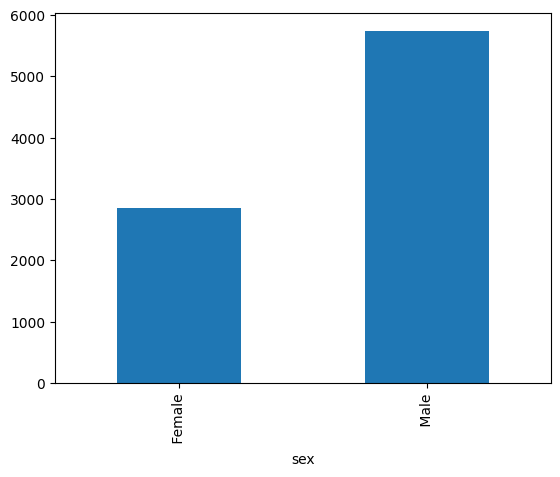

In [19]:
pd.crosstab(train['Salary'],train['sex']).mean().plot(kind='bar')

<Axes: xlabel='relationship'>

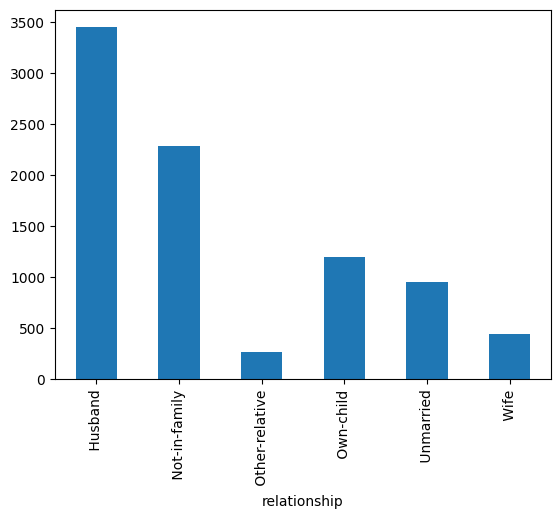

In [20]:
pd.crosstab(train['Salary'],train['relationship']).mean().plot(kind='bar')

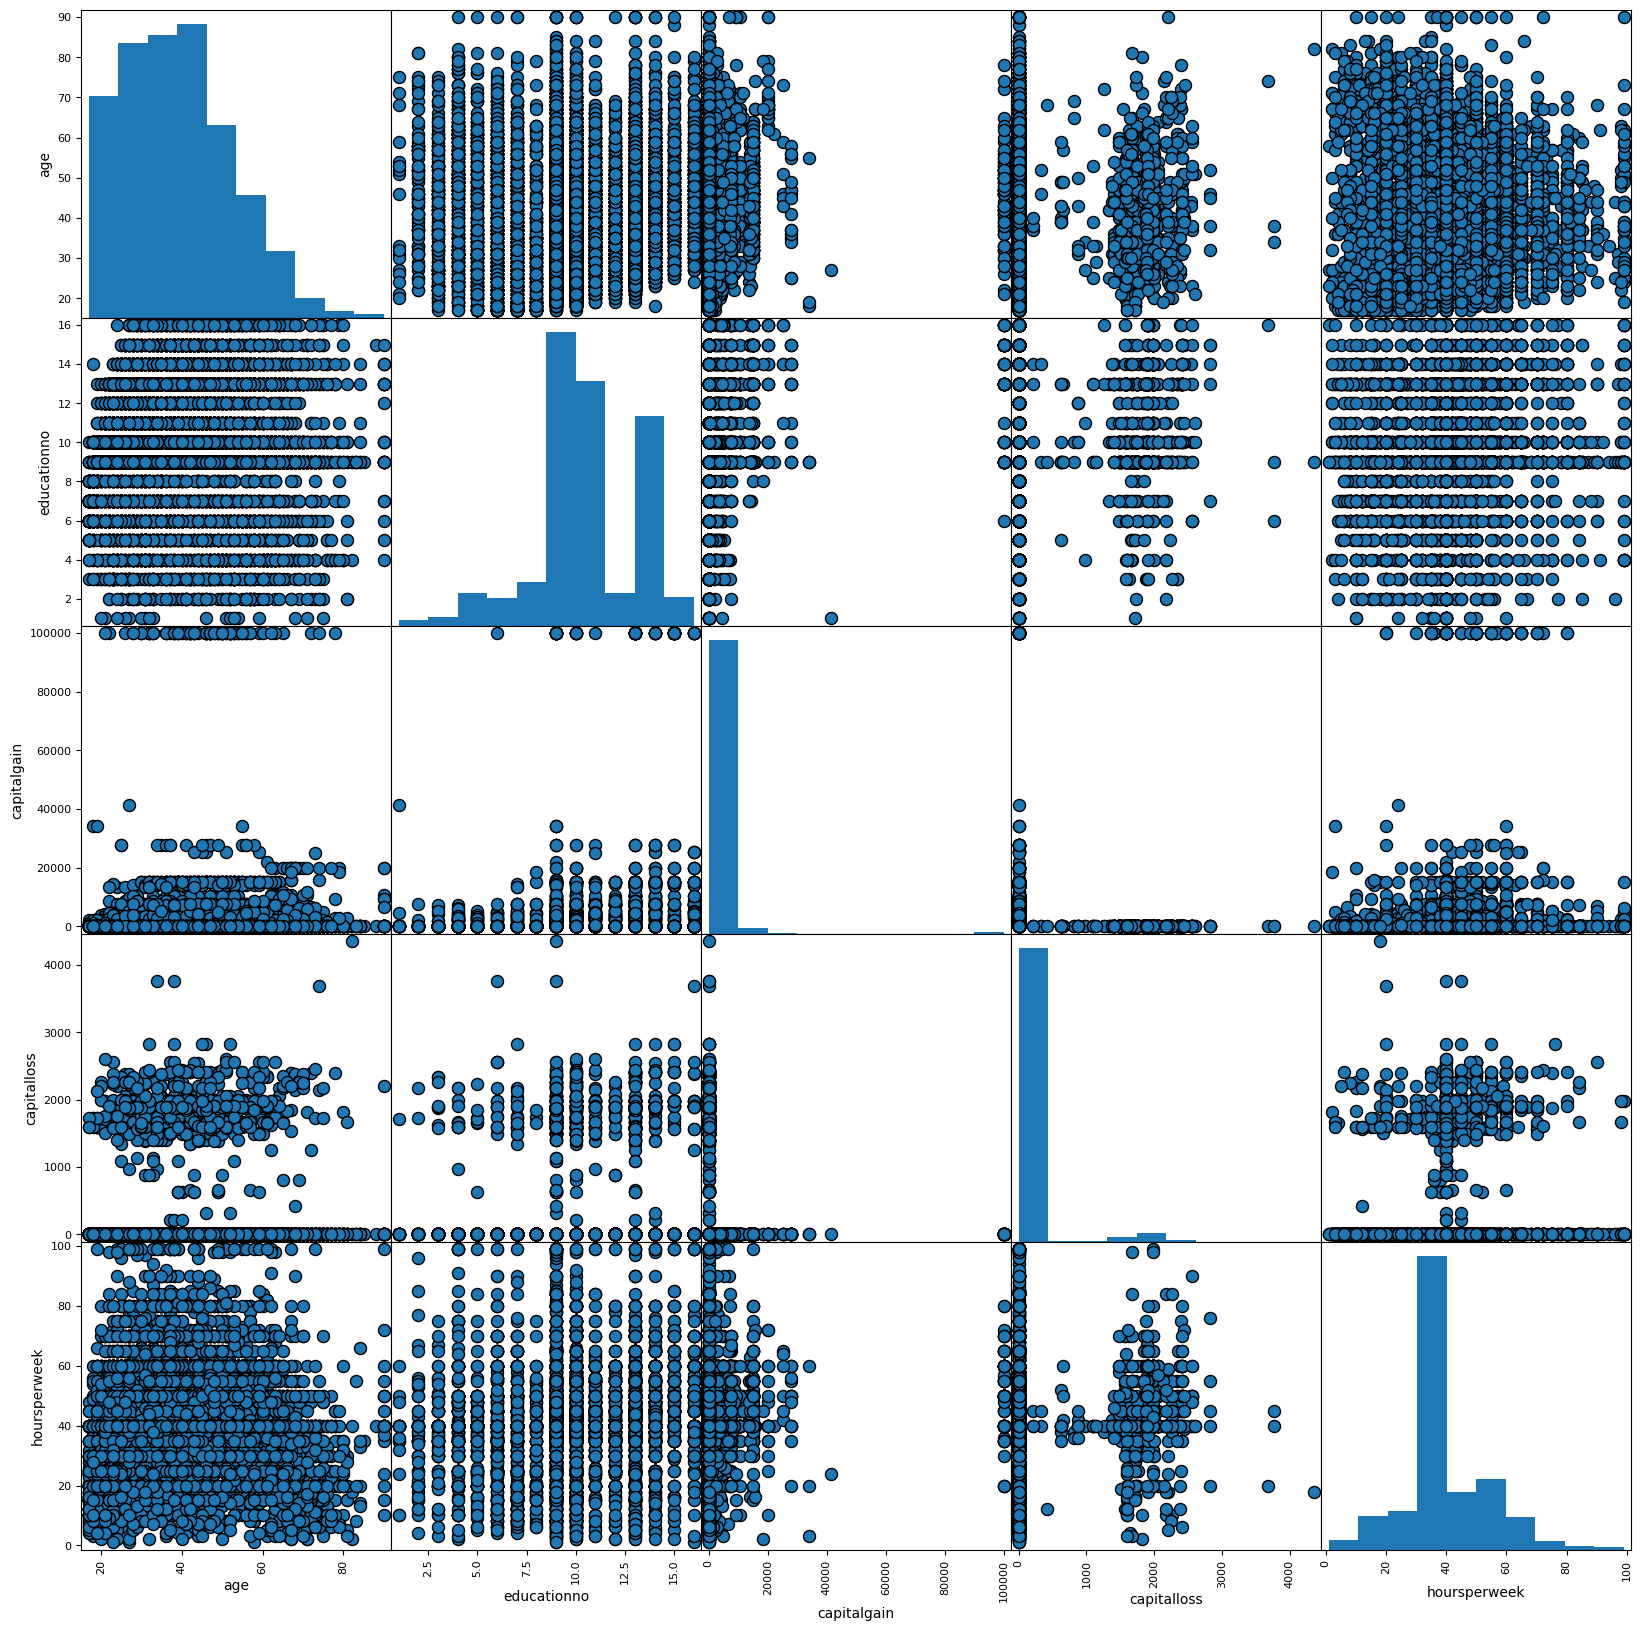

In [21]:
# scatter matrix to observe relationship between every colomn attribute.
pd.plotting.scatter_matrix(train,
                                       figsize= [20,20],
                                       diagonal='hist',
                                       alpha=1,
                                       s = 300,
                                       marker = '.',
                                       edgecolor= "black")
plt.show()

Data preprocessing

In [22]:
train['workclass']=train['workclass'].astype('category')
train['education']=train['education'].astype('category')
train['maritalstatus']=train['maritalstatus'].astype('category')
train['occupation']=train['occupation'].astype('category')
train['relationship']=train['relationship'].astype('category')
train['race']=train['race'].astype('category')
train['sex']=train['sex'].astype('category')
train['native']=train['native'].astype('category')

In [23]:
train['workclass']=train['workclass'].cat.codes
train['education']=train['education'].cat.codes
train['maritalstatus']=train['maritalstatus'].cat.codes
train['occupation']=train['occupation'].cat.codes
train['relationship']=train['relationship'].cat.codes
train['race']=train['race'].cat.codes
train['sex']=train['sex'].cat.codes
train['native']=train['native'].cat.codes

EDA on test data

In [24]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [26]:
test.shape

(15060, 14)

In [27]:
test.isnull().any()

age              False
workclass        False
education        False
educationno      False
maritalstatus    False
occupation       False
relationship     False
race             False
sex              False
capitalgain      False
capitalloss      False
hoursperweek     False
native           False
Salary           False
dtype: bool

In [28]:
test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [29]:
test.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
15055    False
15056    False
15057    False
15058    False
15059    False
Length: 15060, dtype: bool

Data Preprocessing

In [30]:
test['workclass']=test['workclass'].astype('category')
test['education']=test['education'].astype('category')
test['maritalstatus']=test['maritalstatus'].astype('category')
test['occupation']=test['occupation'].astype('category')
test['relationship']=test['relationship'].astype('category')
test['race']=test['race'].astype('category')
test['sex']=test['sex'].astype('category')
test['native']=test['native'].astype('category')

In [31]:
test['workclass']=test['workclass'].cat.codes
test['education']=test['education'].cat.codes
test['maritalstatus']=test['maritalstatus'].cat.codes
test['occupation']=test['occupation'].cat.codes
test['relationship']=test['relationship'].cat.codes
test['race']=test['race'].cat.codes
test['sex']=test['sex'].cat.codes
test['native']=test['native'].cat.codes

In [32]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K


In [33]:
x_train = train.iloc[:,:13]
y_train = train.iloc[:,13]
x_test = test.iloc[:,:13]
y_test = test.iloc[:,13]

In [34]:
##Normalmization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [35]:
x_train = norm_func(x_train)
x_test =  norm_func(x_test)

Naive Baye's Model

In [36]:
# Preparing a naive bayes model on training data set

from sklearn.naive_bayes import MultinomialNB as MB

M_model=MB()
train_pred_multi=M_model.fit(x_train,y_train).predict(x_train)
test_pred_multi=M_model.fit(x_train,y_train).predict(x_test)

ValueError: ignored

In [ ]:
train_acc_multi=np.mean(train_pred_multi==y_train)
train_acc_multi ## train accuracy 74.42

In [ ]:
test_acc_multi=np.mean(test_pred_multi==y_test)
test_acc_multi ## test acuracy 75.15

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, test_pred_multi)

In [ ]:
#print the matrix
confusion_matrix

In [ ]:
#calculating the accuracy of this model w.r.t. this dataset
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,test_pred_multi))

In [ ]:
## GaussianNB for numerical data
from sklearn.naive_bayes import GaussianNB as GB
G_model=GB()
train_pred_gau=G_model.fit(x_train,y_train).predict(x_train)
test_pred_gau=G_model.fit(x_train,y_train).predict(x_test)

In [ ]:
train_acc_gau=np.mean(train_pred_gau==y_train)
train_acc_gau ## train accuracy 79.33

In [ ]:
test_acc_gau=np.mean(test_pred_gau==y_test)
test_acc_gau ## test acuracy 79.57

In [ ]:

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, test_pred_gau)

In [ ]:
#print the matrix
confusion_matrix

In [ ]:

#calculating the accuracy of this model w.r.t. this dataset
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,test_pred_gau))